In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import skimage.transform
#import requests
#import urllib
#import os
#from PIL import Image
#from skimage.filters import threshold_otsu
%matplotlib inline

# Testbed Notebook

This notebook is for testing functions from other places, particularly the ones that handle the weird conversions required to communicate with the road sign. I might be able to simplify the functions in the `.ino` code somewhat using the insights gleaned here? That's the hope anyway. 

Some code from `base.ino`:

```
#define DISPLAY_WIDTH   96
#define DISPLAY_HEIGHT  27
#define DISPLAY_SIZE    (DISPLAY_WIDTH * DISPLAY_HEIGHT)

int CartestianToPixelOffset(int x, int y)
{
    return ((y / PANEL_HEIGHT) * BLOCK_SIZE) + ((y % PANEL_HEIGHT) * PANEL_WIDTH) + (((x / PANEL_WIDTH) * PANEL_SIZE) + PANEL_WIDTH - (x % PANEL_WIDTH)) - 1;
}

int CartesianOffsetToPixelOffset(int offset)
{
    int y = offset / DISPLAY_WIDTH;
    int x = offset - (y * DISPLAY_WIDTH);

    y = (DISPLAY_HEIGHT - 1) - y;

    return CartestianToPixelOffset(x, y);
}

...
for (i = 0; i < DISPLAY_SIZE; i++)
  {
      offset = CartesianOffsetToPixelOffset(i);
      SignFrameBuffer[offset / 8] |= (buf[i] ? 1 : 0) << (i % 8);
  }
...
```

In [2]:
DISPLAY_WIDTH = 96
DISPLAY_HEIGHT = 27
DISPLAY_SIZE = (DISPLAY_WIDTH * DISPLAY_HEIGHT)
PANEL_WIDTH = 24
PANEL_HEIGHT = 9
PANEL_SIZE = (PANEL_WIDTH * PANEL_HEIGHT)
BLOCK_SIZE = (DISPLAY_WIDTH * PANEL_HEIGHT)
print(DISPLAY_SIZE,PANEL_SIZE,BLOCK_SIZE)

2592 216 864


In [3]:
# Python versions of the C functions above...

# I don't like the name of this function. It doesn't really track what it does...
# Extra parameters are because I don't remember how to do global variables in Python.
def CartesianOffsetToPixelOffset(offset, width, height):
    
    # this is simpler than the original version, right?
    x = offset % width
    y = (height - 1) - (offset // width)
    
    # returns more stuff for testing purposes.
    return x, y, CartesianToPixelOffset(x, y, PANEL_WIDTH, PANEL_HEIGHT, BLOCK_SIZE)

# fixed a typo in the word "Cartesian". 
# Extra parameters are because I don't remember how to do global variables in Python.
def CartesianToPixelOffset(x, y, width, height, blocksize):
    # "size" corresponds to PANEL_SIZE
    size = width * height
    return ((y // height) * blocksize) + ((y % height) * width) + (((x // width) * size) + width - (x % width)) - 1


In [4]:
# don't import data like this, kids
buf = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [5]:
xaxis = np.arange(0,DISPLAY_SIZE)
out = np.zeros(DISPLAY_SIZE)
xvec = np.zeros(DISPLAY_SIZE)
yvec = np.zeros(DISPLAY_SIZE)

# The converted array is smaller than the input array, because it's been stacked into 8-bit chunks!
SignFrameBuffer = np.zeros(DISPLAY_SIZE // 8)
SignFrameBuffer.dtype = 'int'

for i in range(DISPLAY_SIZE):
    xvec[i], yvec[i], out[i] = CartesianOffsetToPixelOffset(i, DISPLAY_WIDTH, DISPLAY_HEIGHT)
    #SignFrameBuffer[offset / 8] |= (buf[i] ? 1 : 0) << (i % 8)
    j = int(out[i]) // 8
    
    # can buf[i] just be called directly here, instead of the inline conditional?
    # its values are either 1 or 0...
    #SignFrameBuffer[j] |= (1 if buf[i] else 0) << (i % 8)
    # looks like yes. Also, can I get away with replacing the or-equals with a plus-equals?
    SignFrameBuffer[j] += buf[i] << (i % 8)
    # also looks like yes...but this needs testing in the real system. I'm not even working in the same
    # programming language right now!
    
print(SignFrameBuffer.dtype, SignFrameBuffer.max(), SignFrameBuffer.min())

int64 254 0


(0, 2592)

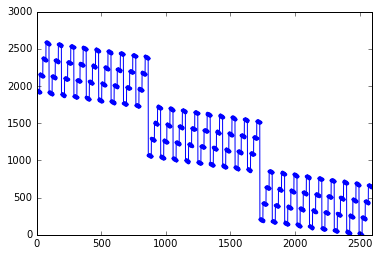

In [6]:
plt.plot(xaxis,out,'.-')
plt.xlim(0,DISPLAY_SIZE)
#plt.xlim(0,DISPLAY_SIZE/3)
#plt.ylim(1500,DISPLAY_SIZE)
# This is the mostly-wrapped version of the image coordinates, graphed. Each run of 8 bits
# also get squashed on top of each other by bit-shifting...

# Converting from (x, y) to this is where I might want to try to simplify next...

[  0.   1.   2. ...,  93.  94.  95.] [ 26.  26.  26. ...,   0.   0.   0.]


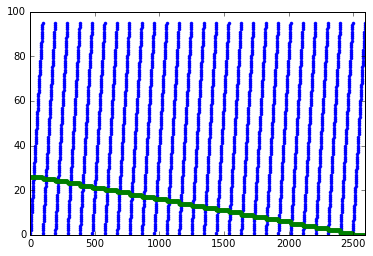

In [7]:
plt.plot(xaxis,xvec,'.', xaxis,yvec,'.')
plt.xlim(0,DISPLAY_SIZE);
print(xvec,yvec)
# everything looks OK here...

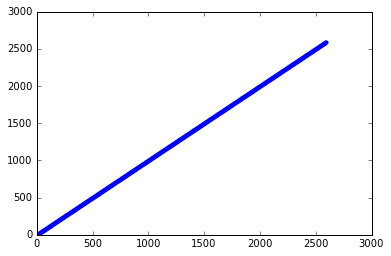

In [8]:
plt.plot(np.sort(out),'.')
# the whole range is covered, in case you weren't sure

In [9]:
out[24]-out[0]

216.0

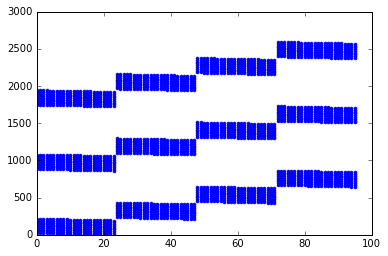

In [10]:
plt.plot(xvec, out,'.')

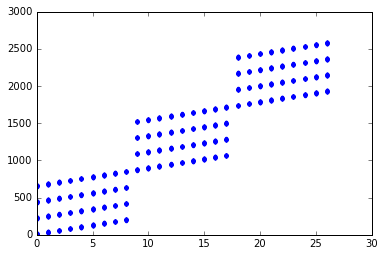

In [11]:
plt.plot(yvec, out,'.')

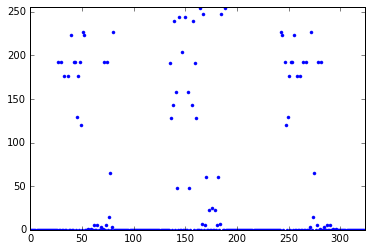

In [12]:
plt.plot(SignFrameBuffer,'.')
plt.xlim(0,SignFrameBuffer.size)
plt.ylim(0,256);

# this is the final data that gets fed to the sign. Apparently this is a snowflake!

In [13]:
buf2 = np.resize(buf,(27, 96))

In [14]:
#plt.pcolormesh(xvec,yvec,buf2)

In [15]:
#plt.plot(xaxis,out,'.')
#plt.xlim(0,56)
print(buf[40:56])
SignFrameBuffer = np.zeros(DISPLAY_SIZE // 8)
SignFrameBuffer.dtype = 'int'

for i in range(56):
    j = int(out[i]) // 8
    SignFrameBuffer[int(out[i]) // 8] |= (1 if buf[i] else 0) << (i % 8)
    sfb = '{:08b}'.format(SignFrameBuffer[j])
    if i >= 40:
        #print(i,j,bin(SignFrameBuffer[j]))
        print(i,j,sfb)
        
# Just investigating the intermediate steps in here. You can see the three 1's in the source
# data get converted into a 192 and a 1 in the final data...

[0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
40 267 00000000
41 267 00000000
42 267 00000000
43 267 00000000
44 267 00000000
45 267 00000000
46 267 01000000
47 267 11000000
48 296 00000001
49 296 00000001
50 296 00000001
51 296 00000001
52 296 00000001
53 296 00000001
54 296 00000001
55 296 00000001


In [16]:
jvec = out // 8

(0, 500)

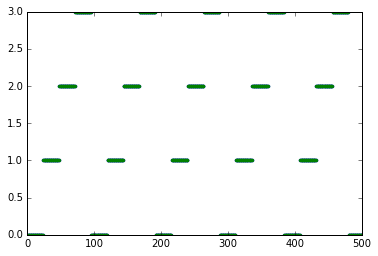

In [17]:
plt.plot((xaxis % DISPLAY_WIDTH)//PANEL_WIDTH,'.') # "old x1"
plt.plot((xaxis//PANEL_WIDTH) % (DISPLAY_WIDTH/PANEL_WIDTH),'.') # "new x1"
plt.xlim(0,500)

(0, 500)

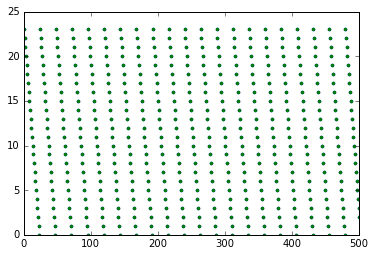

In [18]:
plt.plot(PANEL_WIDTH - 1 - ((xaxis % DISPLAY_WIDTH) % PANEL_WIDTH),'.') # "old x2"
plt.plot(PANEL_WIDTH - 1 - (xaxis % PANEL_WIDTH),'.') # "new x2"
plt.xlim(0,500)

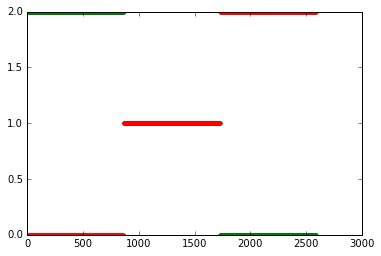

In [19]:
plt.plot((DISPLAY_HEIGHT - 1 - (xaxis // DISPLAY_WIDTH)) // PANEL_HEIGHT,'.') # "old y1"
plt.plot((DISPLAY_HEIGHT / PANEL_HEIGHT) - 1 - (xaxis // BLOCK_SIZE),'.') # "new y1"
plt.plot(xaxis // BLOCK_SIZE,'.') # "new y1" with flipped image
#plt.xlim(0,500)

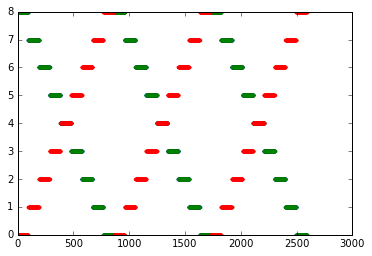

In [20]:
plt.plot((DISPLAY_HEIGHT - 1 - (xaxis // DISPLAY_WIDTH)) % PANEL_HEIGHT,'.') # "old y2"
plt.plot(PANEL_HEIGHT - 1 - ((xaxis // DISPLAY_WIDTH) % PANEL_HEIGHT),'.') # "new y2"
plt.plot((xaxis // DISPLAY_WIDTH) % PANEL_HEIGHT,'.') # "new y2" with flipped image
#plt.xlim(0,500)

## Conclusions?

So, it looks like the addressing order of the sign is complex enough that it makes sense to specify 4 coordinates. Call them x1, x2, y1, and y2. x1 and y1 tell you which panel you're in, and x2 and y2 tell you where you are inside that panel. 

We can calculate these coordinates directly from the original linear index of the 2D matrix. It helps if we flip the image upside-down before exporting the data to a `.h` file, so that the "origin" is in the bottom left. The equations are then:
```
x1 = (index/PANEL_WIDTH) % (DISPLAY_WIDTH/PANEL_WIDTH)
y1 = index // BLOCK_SIZE
x2 = PANEL_WIDTH - 1 - (index % PANEL_WIDTH)
y2 = (index // DISPLAY_WIDTH) % PANEL_HEIGHT

```
The formula for converting from these coordinates to the correct linear index for the sign is:
```
sign_index = x2 + PANEL_WIDTH*y2 + PANEL_SIZE*x1 + BLOCK_SIZE*y1
```
And then, as before, each set of 8 successive entries gets stacked into one byte by the bit shift thing.